In [1]:
## Importing Libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Loading the metadata
metadata = pd.read_csv('Datasets/HAM10000_metadata.tsv', sep=',')

In [3]:
metadata.tail(20)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
9995,HAM_0000193,ISIC_0027950,akiec,histo,60.0,female,face,rosendahl
9996,HAM_0006180,ISIC_0027615,akiec,histo,70.0,male,upper extremity,rosendahl
9997,HAM_0006180,ISIC_0028990,akiec,histo,70.0,male,upper extremity,rosendahl
9998,HAM_0004282,ISIC_0033358,akiec,histo,65.0,female,face,vidir_modern
9999,HAM_0000356,ISIC_0030655,akiec,histo,60.0,female,face,rosendahl
10000,HAM_0004282,ISIC_0033151,akiec,histo,65.0,female,face,vidir_modern
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face,rosendahl
10002,HAM_0006442,ISIC_0032947,akiec,histo,70.0,male,hand,vidir_modern
10003,HAM_0004592,ISIC_0029141,akiec,histo,60.0,female,face,rosendahl
10004,HAM_0005579,ISIC_0029309,akiec,histo,80.0,male,face,rosendahl


In [4]:
### 
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [5]:
## Check for missing values in metadata
metadata.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

- There are 57 missing entries for the age column. 
- We will drop those 57 entires since it won't affect or change much of the meaning of our data. 

The metadata has unique entries for the image_id, hence we need to check how many there are

In [6]:
metadata_image_count = metadata['image_id'].nunique()
metadata_image_count

10015

In [7]:
# path to the image folder
image_folder = 'Datasets/HAM10000_images_full/'

# Count all .jpg files in the folder
image_count = len([file for file in os.listdir(image_folder) if file.endswith('.jpg')])

print(f'Total images in HAM10000 folder: {image_count}')

Total images in HAM10000 folder: 10015


#### Insight
- We can see the image_id in the metadata and the count of the actual images are the same ie 10015 as expected. 
- But we also notice there are 57 null values in the age column of the metadata
- We will be replacing the missing ages with the median age(median is robust to outliers)

In [8]:
## Filling missing values in age column with median age
median_age = metadata['age'].median()
metadata['age'].fillna(median_age, inplace=True)
metadata.isna().sum()

C:\Users\tette\AppData\Local\Temp\ipykernel_34024\2522976323.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata['age'].fillna(median_age, inplace=True)


lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

### Univariate Analysis
Distribution of Data By Age, Sex, localization, diagnosis

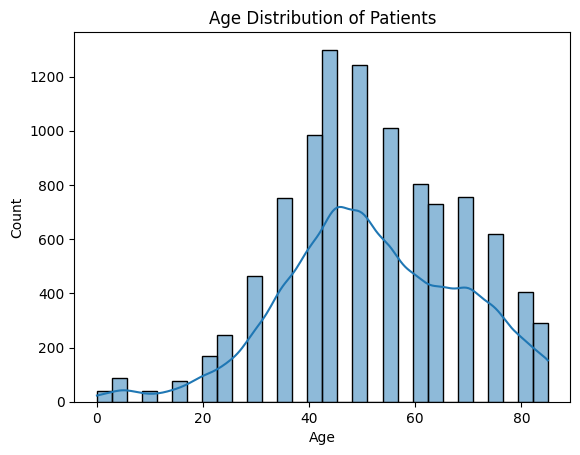

In [9]:
## Visualizing the age distribution
sns.histplot(metadata['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


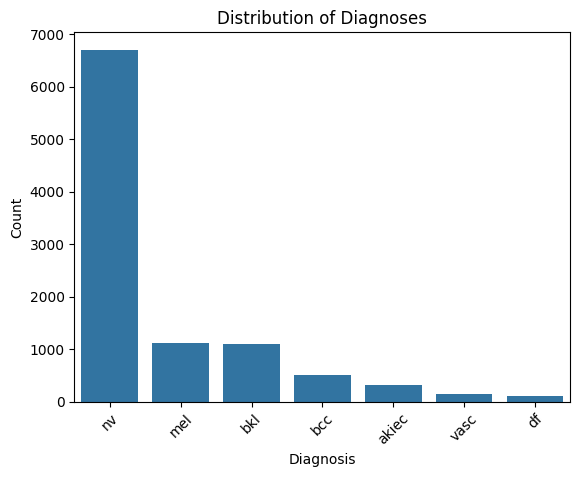

In [10]:
## Visualizing the distribution of Diagnoses
sns.countplot(data=metadata, x='dx', order=metadata['dx'].value_counts().index)
plt.title('Distribution of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


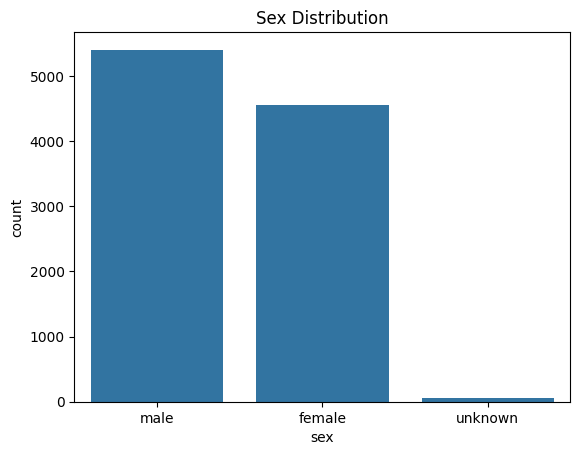

In [11]:
## visualizing the distribution of Sex
sns.countplot(data=metadata, x='sex')
plt.title('Sex Distribution')
plt.show()


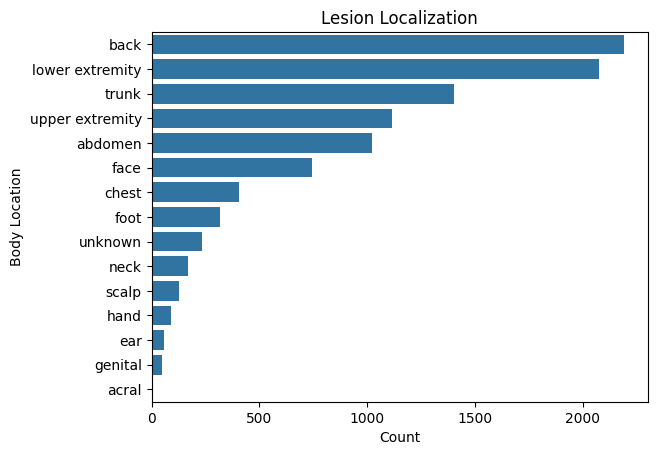

In [12]:
## Visualizing the distribution of localization
sns.countplot(data=metadata, y='localization', order=metadata['localization'].value_counts().index)
plt.title('Lesion Localization')
plt.xlabel('Count')
plt.ylabel('Body Location')
plt.show()


### Bivariate Analysis

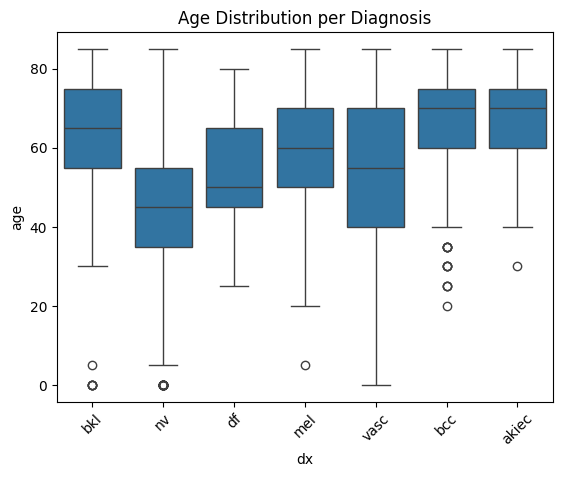

In [13]:
## Visualizing Age Distribution per Diagnosis
sns.boxplot(data=metadata, x='dx', y='age')
plt.title('Age Distribution per Diagnosis')
plt.xticks(rotation=45)
plt.show()


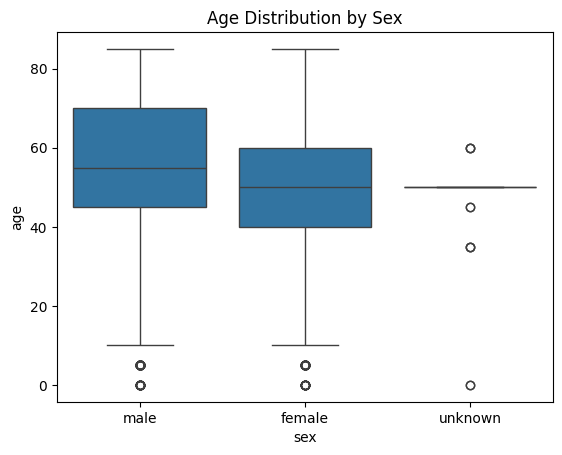

In [14]:
sns.boxplot(data=metadata, x='sex', y='age')
plt.title('Age Distribution by Sex')
plt.show()


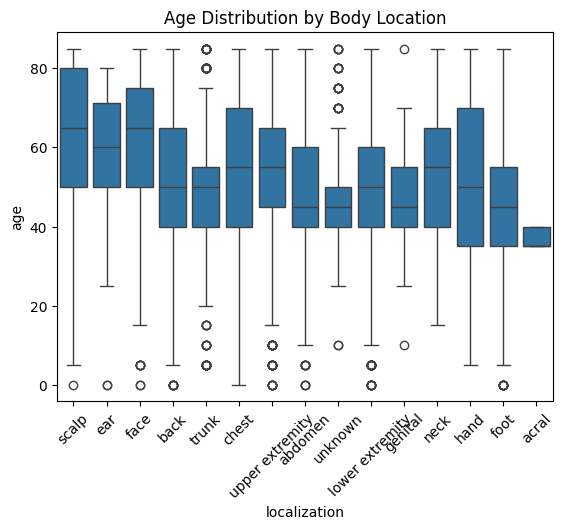

In [15]:
sns.boxplot(data=metadata, x='localization', y='age')
plt.xticks(rotation=45)
plt.title('Age Distribution by Body Location')
plt.show()


### Key Insights derived from Univariate and BiVariate Analysis
- From the distribution of our diagnosis, we can see our classes are very unbalanced. We might need to explore techniques for balancing it before training
- MAjority of the lesion images were from the trunk, back, lower and upper extremity
- The age distribution looks normally distributed

What Does Each Lesion type look like?

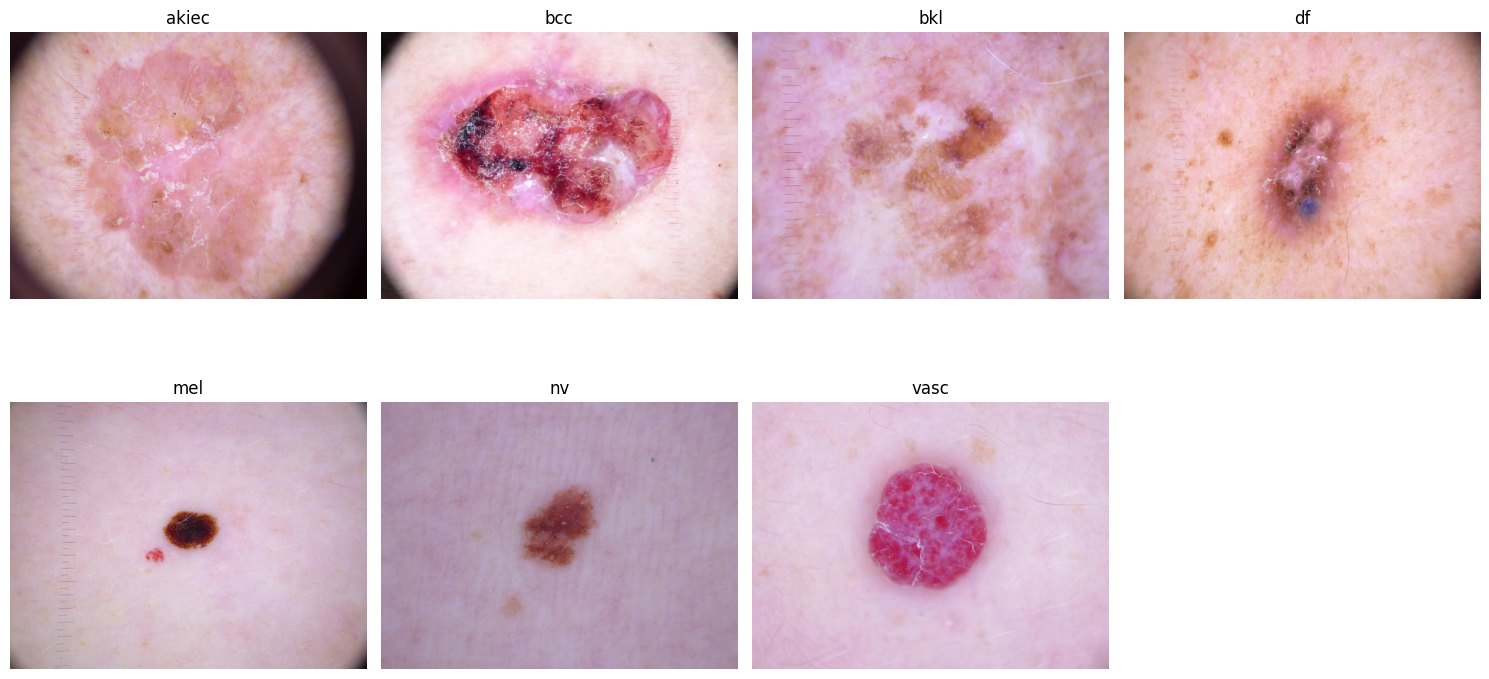

In [11]:
# Image folder path
image_folder = 'Datasets/HAM10000_images_full/'

# Get one image per class
unique_diagnoses = metadata['dx'].unique()
sample_images = metadata.groupby('dx').first().reset_index()

# Plotting
plt.figure(figsize=(15, 8))

for idx, row in sample_images.iterrows():
    image_path = os.path.join(image_folder, row['image_id'] + '.jpg')
    
    # Open and display the image
    image = Image.open(image_path)
    plt.subplot(2, 4, idx + 1)  # adjust rows/cols as needed
    plt.imshow(image)
    plt.title(row['dx'])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:
# Get class distribution
class_counts = metadata['dx'].value_counts()
print("Class Distribution:\n", class_counts)


Class Distribution:
 dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


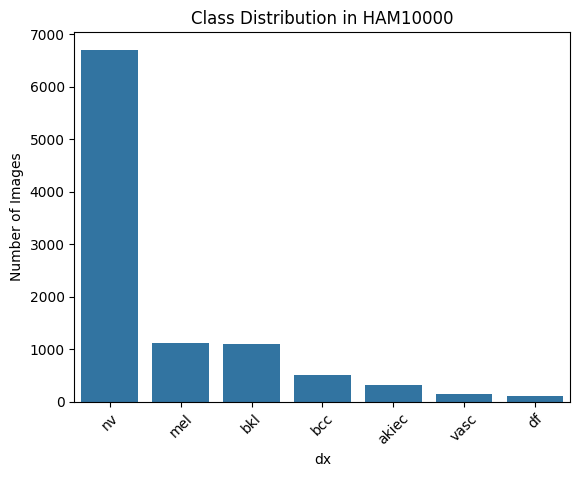

In [13]:
sns.countplot(data=metadata, x='dx', order=class_counts.index)
plt.title('Class Distribution in HAM10000')
plt.xticks(rotation=45)
plt.ylabel('Number of Images')
plt.show()


Creating heatmap: Lesion Types by Body Localization...


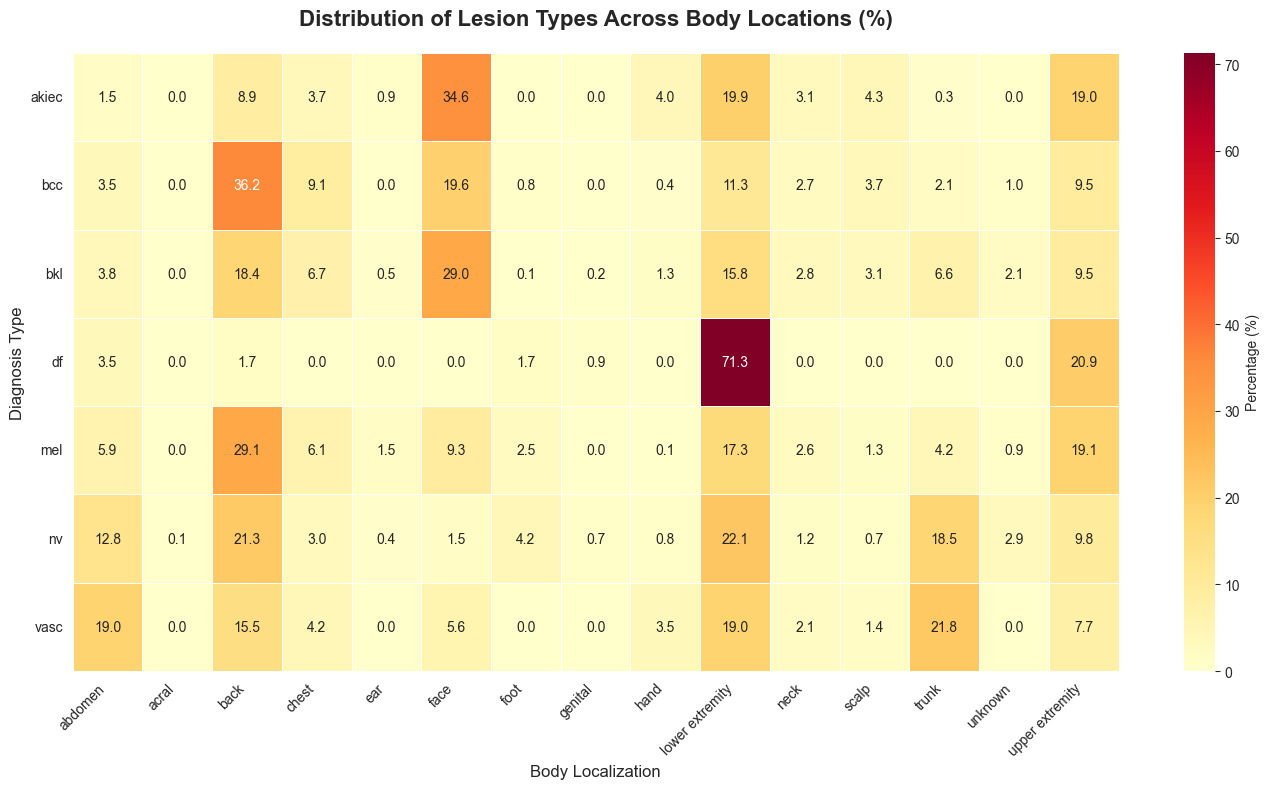


Creating box plot: Age Distribution by Diagnosis...


C:\Users\tette\AppData\Local\Temp\ipykernel_18888\2601364575.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metadata_clean, x='dx', y='age', palette='Set3', linewidth=2)


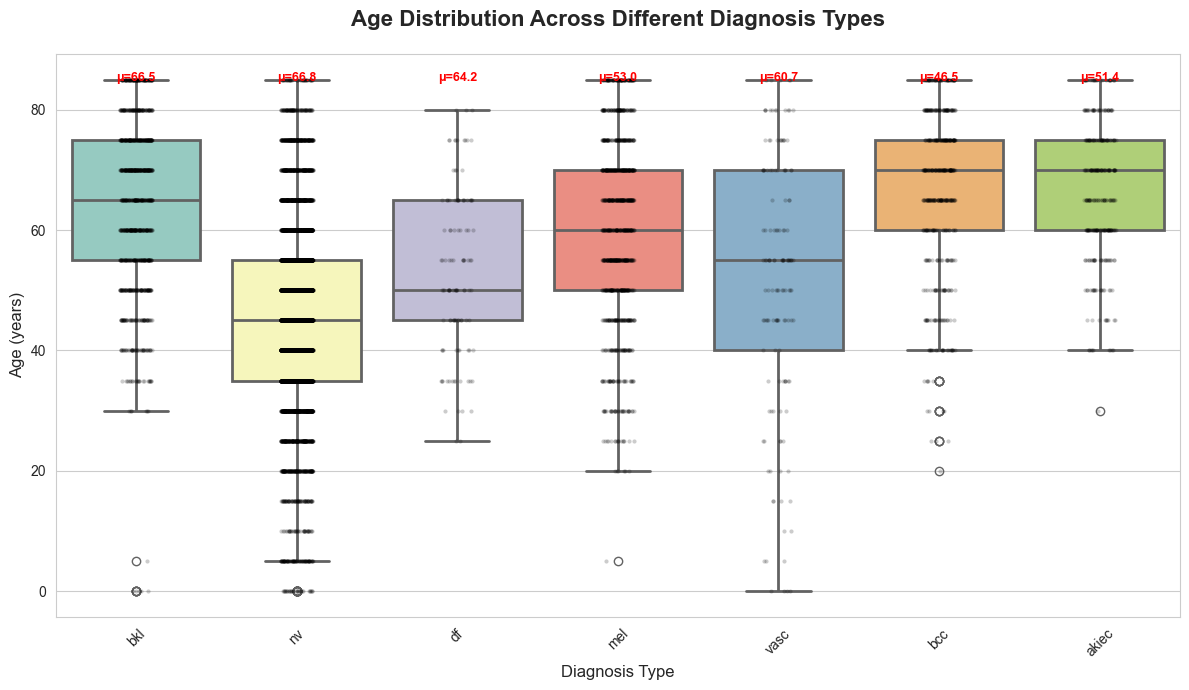


Creating stacked bar chart: Sex Distribution by Diagnosis...


<Figure size 1200x700 with 0 Axes>

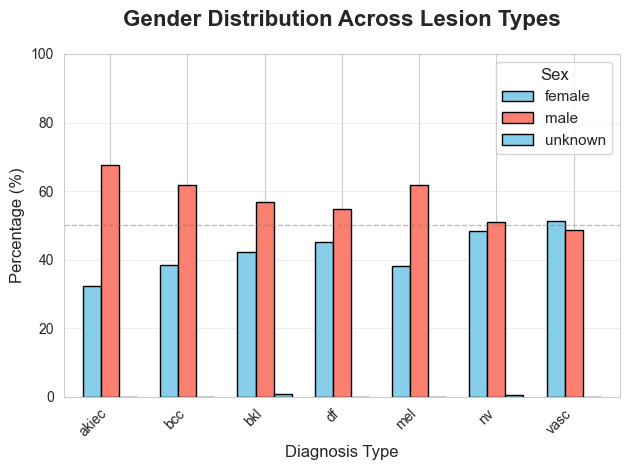


Creating plot: Top Body Locations by Diagnosis...


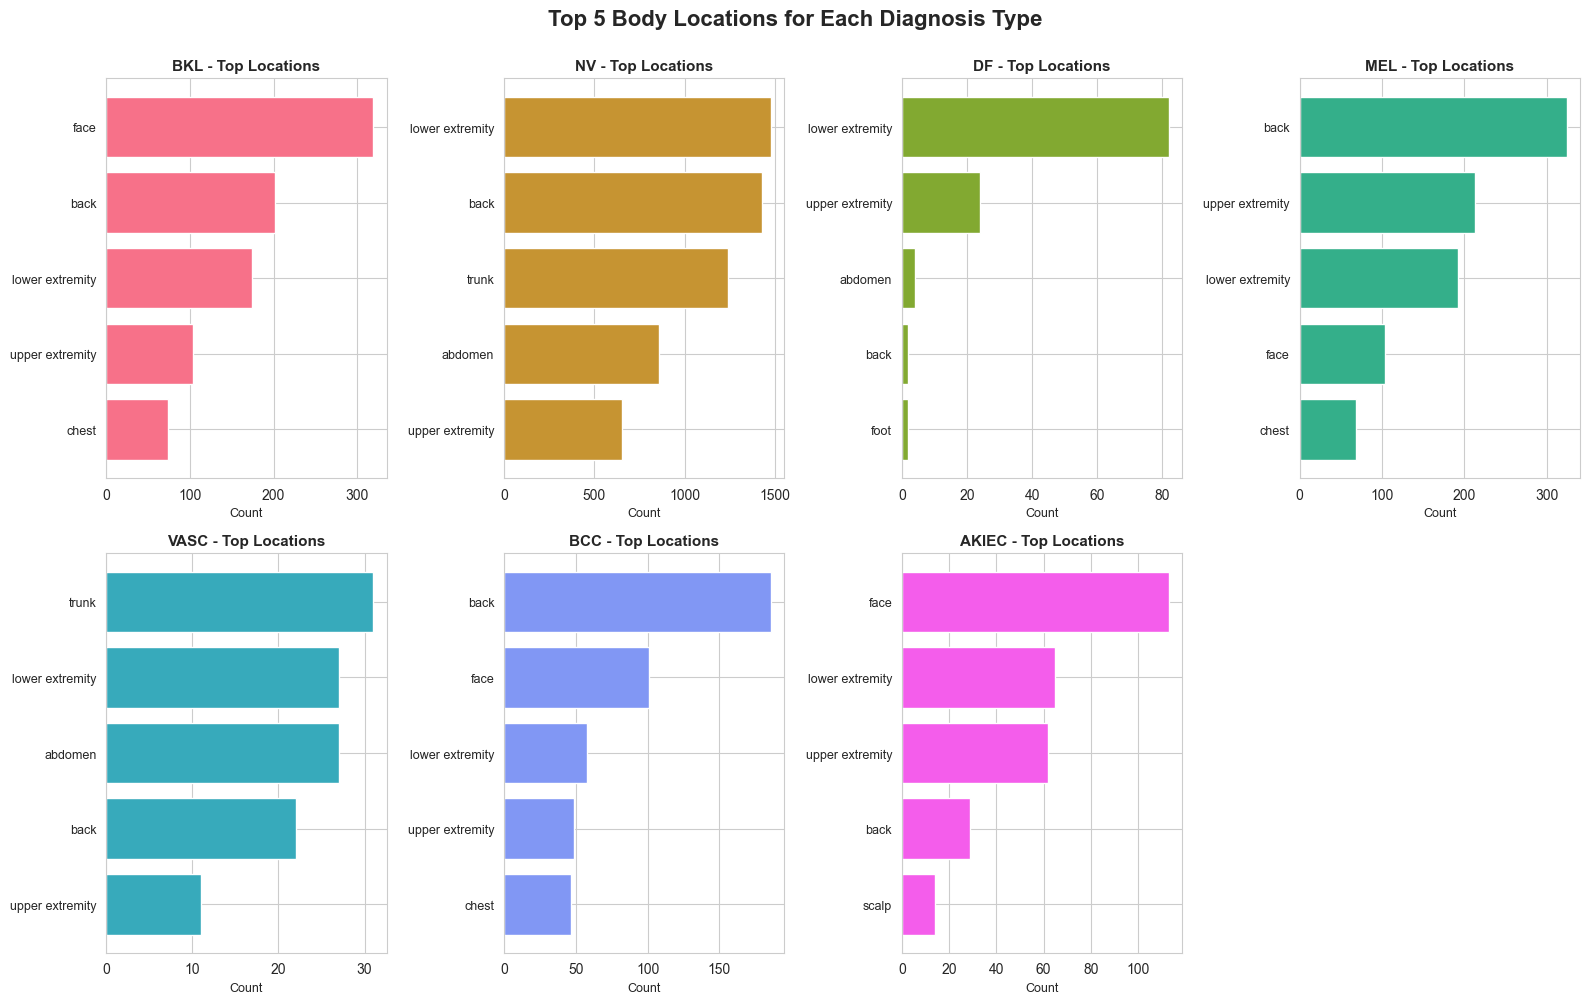

STATISTICAL INSIGHTS

1. AGE VARIATION BY DIAGNOSIS:
        mean    std  median
dx                         
akiec  66.53  11.48    70.0
bcc    66.83  13.66    70.0
bkl    64.15  14.12    65.0
df     53.04  13.55    50.0
mel    60.66  15.18    60.0
nv     46.50  15.13    45.0
vasc   51.37  21.64    55.0

2. SEX DISTRIBUTION BY DIAGNOSIS (%):
sex    female  male  unknown
dx                          
akiec    32.4  67.6      0.0
bcc      38.3  61.7      0.0
bkl      42.1  57.0      0.9
df       45.2  54.8      0.0
mel      38.1  61.9      0.0
nv       48.3  51.0      0.7
vasc     51.4  48.6      0.0

3. TOP LOCATION FOR EACH DIAGNOSIS:
  bkl: face (319/1099 = 29.0%)
  nv: lower extremity (1479/6705 = 22.1%)
  df: lower extremity (82/115 = 71.3%)
  mel: back (324/1113 = 29.1%)
  vasc: trunk (31/142 = 21.8%)
  bcc: back (186/514 = 36.2%)
  akiec: face (113/327 = 34.6%)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")

# 1. LESION TYPES BY BODY LOCALIZATION (Heatmap)
print("Creating heatmap: Lesion Types by Body Localization...")
plt.figure(figsize=(14, 8))

# Create crosstab of diagnosis vs localization
crosstab = pd.crosstab(metadata['dx'], metadata['localization'])

# Normalize by row to show percentage distribution for each diagnosis
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5)
plt.title('Distribution of Lesion Types Across Body Locations (%)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Body Localization', fontsize=12)
plt.ylabel('Diagnosis Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. AGE DISTRIBUTION BY DIAGNOSIS (Box Plot with Stats)
print("\nCreating box plot: Age Distribution by Diagnosis...")
plt.figure(figsize=(12, 7))

metadata_clean = metadata.dropna(subset=['age'])
sns.boxplot(data=metadata_clean, x='dx', y='age', palette='Set3', linewidth=2)
sns.stripplot(data=metadata_clean, x='dx', y='age', color='black', 
              alpha=0.2, size=3, jitter=True)

plt.title('Age Distribution Across Different Diagnosis Types', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Diagnosis Type', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.xticks(rotation=45)

# Add mean values as text
means = metadata_clean.groupby('dx')['age'].mean()
for i, (dx, mean_val) in enumerate(means.items()):
    plt.text(i, plt.ylim()[1] * 0.95, f'μ={mean_val:.1f}', 
             ha='center', fontsize=9, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# 3. SEX DISTRIBUTION BY DIAGNOSIS (Stacked Bar Chart)
print("\nCreating stacked bar chart: Sex Distribution by Diagnosis...")
plt.figure(figsize=(12, 7))

# Create crosstab of diagnosis vs sex
sex_crosstab = pd.crosstab(metadata['dx'], metadata['sex'], normalize='index') * 100

sex_crosstab.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], 
                  edgecolor='black', width=0.7)
plt.title('Gender Distribution Across Lesion Types', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Diagnosis Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Sex', fontsize=11, title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.axhline(y=50, color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. BONUS: Localization preference by diagnosis (Top 3 locations)
print("\nCreating plot: Top Body Locations by Diagnosis...")
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

dx_types = metadata['dx'].unique()
for idx, dx in enumerate(dx_types):
    if idx < len(axes):
        dx_data = metadata[metadata['dx'] == dx]
        loc_counts = dx_data['localization'].value_counts().head(5)
        
        axes[idx].barh(range(len(loc_counts)), loc_counts.values, 
                       color=sns.color_palette('husl', len(dx_types))[idx])
        axes[idx].set_yticks(range(len(loc_counts)))
        axes[idx].set_yticklabels(loc_counts.index, fontsize=9)
        axes[idx].set_xlabel('Count', fontsize=9)
        axes[idx].set_title(f'{dx.upper()} - Top Locations', fontsize=11, fontweight='bold')
        axes[idx].invert_yaxis()

# Hide extra subplots
for idx in range(len(dx_types), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Top 5 Body Locations for Each Diagnosis Type', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print statistical insights

print("STATISTICAL INSIGHTS")


print("\n1. AGE VARIATION BY DIAGNOSIS:")
age_stats = metadata_clean.groupby('dx')['age'].agg(['mean', 'std', 'median'])
print(age_stats.round(2))

print("\n2. SEX DISTRIBUTION BY DIAGNOSIS (%):")
print(sex_crosstab.round(1))

print("\n3. TOP LOCATION FOR EACH DIAGNOSIS:")
for dx in metadata['dx'].unique():
    top_loc = metadata[metadata['dx'] == dx]['localization'].value_counts().index[0]
    count = metadata[metadata['dx'] == dx]['localization'].value_counts().iloc[0]
    total = len(metadata[metadata['dx'] == dx])
    print(f"  {dx}: {top_loc} ({count}/{total} = {count/total*100:.1f}%)")

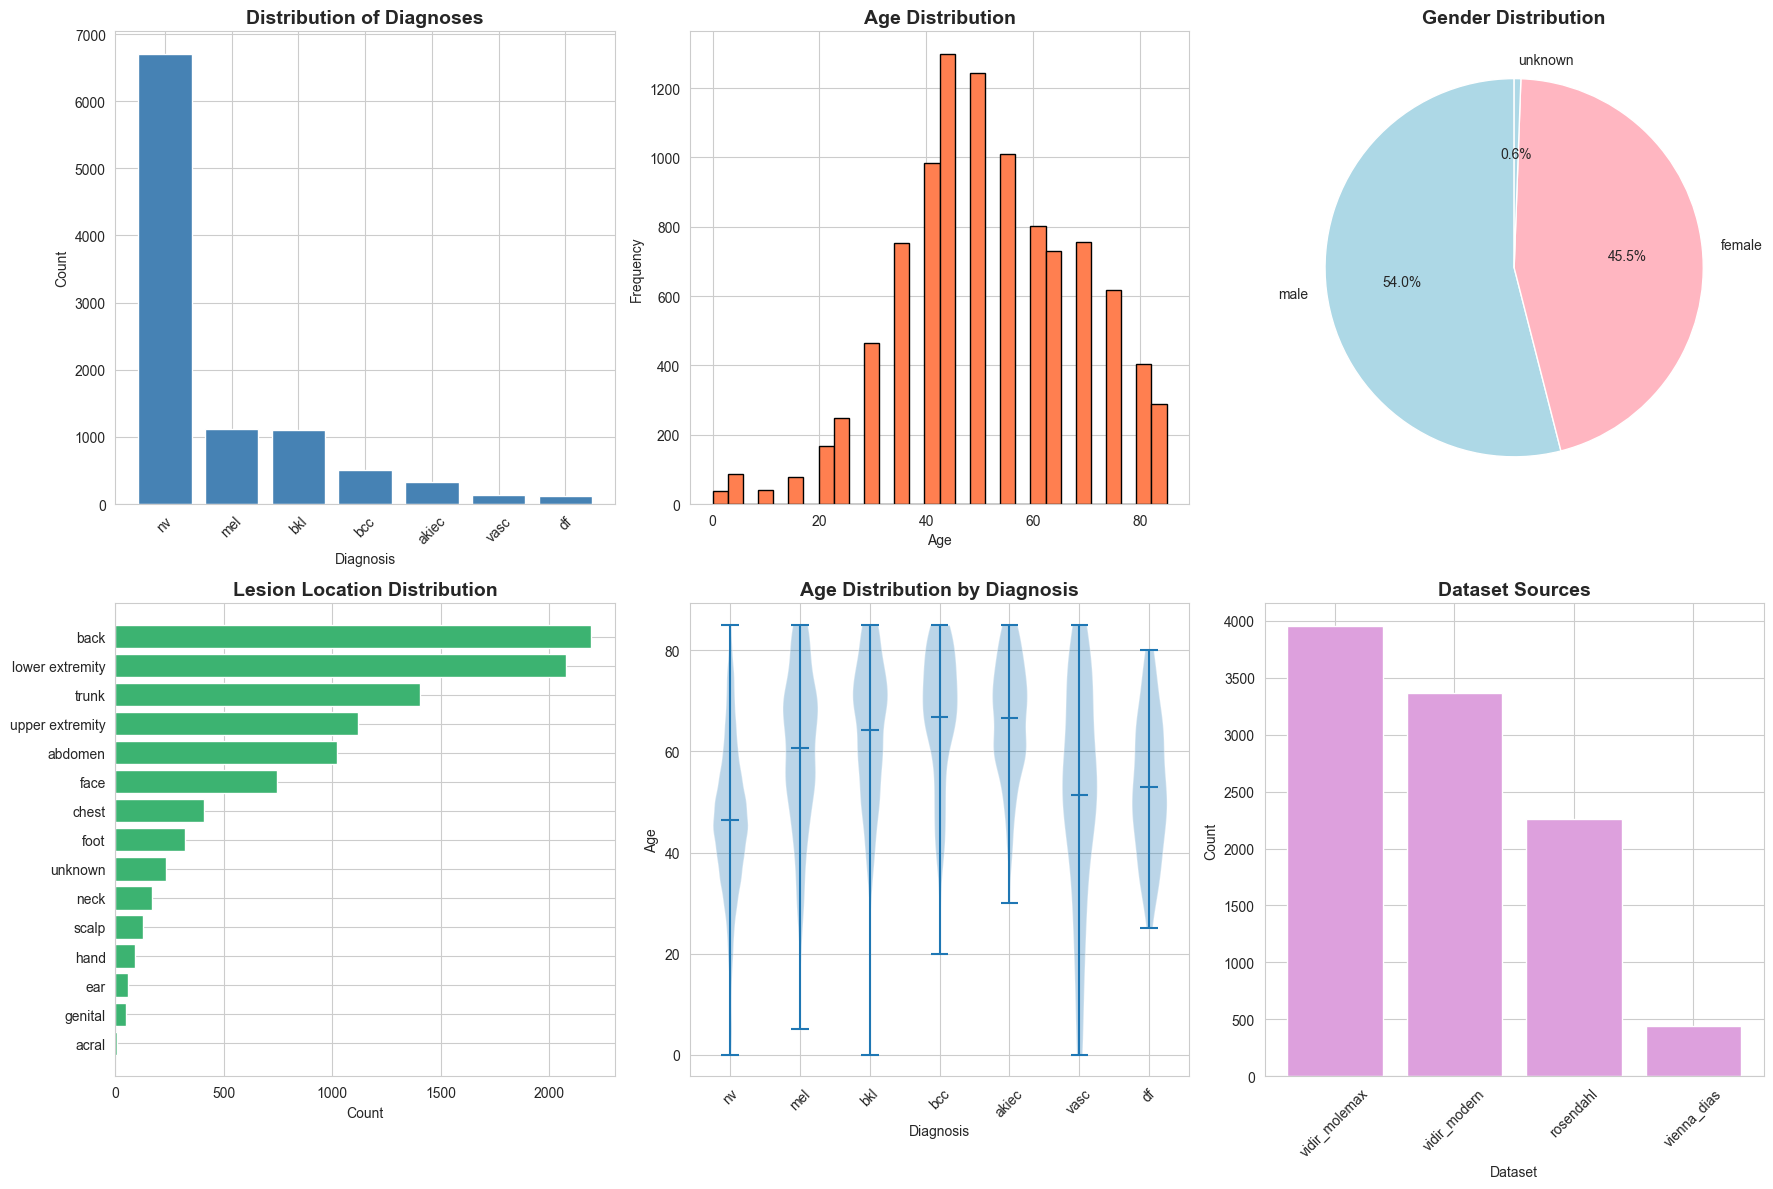


SUMMARY STATISTICS

Total samples: 10015

Age statistics:
count    10015.000000
mean        51.853220
std         16.920833
min          0.000000
25%         40.000000
50%         50.000000
75%         65.000000
max         85.000000
Name: age, dtype: float64

Missing values:
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

Diagnosis distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

Gender distribution:
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of diagnoses
dx_counts = metadata['dx'].value_counts()
axes[0, 0].bar(dx_counts.index, dx_counts.values, color='steelblue')
axes[0, 0].set_title('Distribution of Diagnoses', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Diagnosis')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Age distribution
metadata['age'].dropna().hist(bins=30, ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# 3. Gender distribution
sex_counts = metadata['sex'].value_counts()
axes[0, 2].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightpink'], startangle=90)
axes[0, 2].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# 4. Localization distribution
loc_counts = metadata['localization'].value_counts()
axes[1, 0].barh(loc_counts.index, loc_counts.values, color='mediumseagreen')
axes[1, 0].set_title('Lesion Location Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].invert_yaxis()

# 5. Age by diagnosis (boxplot)
metadata_clean = metadata.dropna(subset=['age'])
axes[1, 1].violinplot([metadata_clean[metadata_clean['dx'] == dx]['age'].values 
                        for dx in dx_counts.index],
                       positions=range(len(dx_counts)),
                       showmeans=True)
axes[1, 1].set_xticks(range(len(dx_counts)))
axes[1, 1].set_xticklabels(dx_counts.index, rotation=45)
axes[1, 1].set_title('Age Distribution by Diagnosis', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Diagnosis')
axes[1, 1].set_ylabel('Age')

# 6. Dataset sources
dataset_counts = metadata['dataset'].value_counts()
axes[1, 2].bar(dataset_counts.index, dataset_counts.values, color='plum')
axes[1, 2].set_title('Dataset Sources', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Dataset')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"\nTotal samples: {len(metadata)}")
print(f"\nAge statistics:")
print(metadata['age'].describe())
print(f"\nMissing values:")
print(metadata.isnull().sum())
print(f"\nDiagnosis distribution:")
print(metadata['dx'].value_counts())
print(f"\nGender distribution:")
print(metadata['sex'].value_counts())

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    validation_split=0.2,  # 80/20 train-validation split
    rescale=1./255
)


In [15]:
image_folder = 'Datasets/HAM10000_images_full/'  # images path

In [16]:
import os

image_folder = 'Datasets/HAM10000_images_full'  # images path
image_files = os.listdir(image_folder)

# Check a few files
print(image_files[:5])


['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg']


In [17]:
# Add .jpg extension if needed
metadata['filename'] = metadata['image_id'] + '.jpg'


In [18]:
print(metadata['dx'].value_counts())


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [19]:


datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

train_data = datagen.flow_from_dataframe(
    dataframe=metadata,
    directory='Datasets/HAM10000_images_full',  # this should be the folder with all .jpg files
    x_col='filename',              # must include .jpg
    y_col='dx',
    subset='training',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    seed=42,
    shuffle=True
)

val_data = datagen.flow_from_dataframe(
    dataframe=metadata,
    directory='Datasets/HAM10000_images_full',
    x_col='filename',
    y_col='dx',
    subset='validation',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    seed=42,
    shuffle=False
)


Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


In [20]:
 
# ===== TRAINING DATA WITH AUGMENTATION =====
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Important for skin lesions
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2  # Keep the split
)

# ===== VALIDATION DATA (NO AUGMENTATION) =====
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Keep the split
)

# ===== CREATE GENERATORS =====
train_data = train_datagen.flow_from_dataframe(
    dataframe=metadata,
    directory='Datasets/HAM10000_images_full',
    x_col='filename',
    y_col='dx',
    subset='training',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    seed=42,
    shuffle=True
)

val_data = val_datagen.flow_from_dataframe(
    dataframe=metadata,
    directory='Datasets/HAM10000_images_full',
    x_col='filename',
    y_col='dx',
    subset='validation',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    seed=42,
    shuffle=False
)

print(f"Training samples: {train_data.samples}")
print(f"Validation samples: {val_data.samples}")

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
Training samples: 8012
Validation samples: 2003


In [21]:


# ===== FIXED STRATIFIED SPLIT =====
print("=== CREATING PROPER STRATIFIED SPLIT ===")

# First, let's check your metadata
print("Original metadata class distribution:")
print(metadata['dx'].value_counts().sort_index())

# Create stratified train/validation split
train_df, val_df = train_test_split(
    metadata,
    test_size=0.2,
    stratify=metadata['dx'],  # This ensures all classes are represented
    random_state=42
)

print(f"\nTraining set size: {len(train_df)}")
print("Training class distribution:")
print(train_df['dx'].value_counts().sort_index())

print(f"\nValidation set size: {len(val_df)}")
print("Validation class distribution:")
print(val_df['dx'].value_counts().sort_index())

# ===== CREATE GENERATORS WITH PROPER SPLIT =====
# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators using the properly split dataframes
train_data = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # Use the training dataframe
    directory='Datasets/HAM10000_images_full',
    x_col='filename',
    y_col='dx',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True
)

val_data = val_datagen.flow_from_dataframe(
    dataframe=val_df,  # Use the validation dataframe
    directory='Datasets/HAM10000_images_full',
    x_col='filename',
    y_col='dx',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

print(f"✅ Training samples: {train_data.samples}")
print(f"✅ Validation samples: {val_data.samples}")

=== CREATING PROPER STRATIFIED SPLIT ===
Original metadata class distribution:
dx
akiec     327
bcc       514
bkl      1099
df        115
mel      1113
nv       6705
vasc      142
Name: count, dtype: int64

Training set size: 8012
Training class distribution:
dx
akiec     262
bcc       411
bkl       879
df         92
mel       890
nv       5364
vasc      114
Name: count, dtype: int64

Validation set size: 2003
Validation class distribution:
dx
akiec      65
bcc       103
bkl       220
df         23
mel       223
nv       1341
vasc       28
Name: count, dtype: int64
Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
✅ Training samples: 8012
✅ Validation samples: 2003


Insights
- We need to note that since our class is imbalanced, our model might be bias hence we need to assign class weights to the various classes to resolve this issue.
- Lets train without class weights first and observe the performance

In [29]:
from tensorflow.keras.applications import ResNet50

# ===== Training Resnet without assigning class wieghts =====


model = tf.keras.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.layers[0].trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Standard LR
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

print("Training 1 epoch WITHOUT class weights...")
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data,
    class_weight=None,  # No weights initially
    verbose=1
)

train_acc = history.history['accuracy'][0]
val_acc = history.history['val_accuracy'][0]

print(f"\n📊 Initial results:")
print(f"Training accuracy: {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")

# What to look out for:
if train_acc > 0.6:
    print("✅ Good! Model is learning. Now we can add moderate class weights.")
    # Continue training with moderate weights
elif train_acc > 0.3:
    print("⚠️  Okay, but could be better. Check data pipeline.")
else:
    print("❌ Poor performance. There's a fundamental issue.")

Training 1 epoch WITHOUT class weights...


c:\Documentpc\Skin_Cancer_Detection\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.6613 - loss: 1.1681 - val_accuracy: 0.6695 - val_loss: 1.1305
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.6694 - loss: 1.1363 - val_accuracy: 0.6695 - val_loss: 1.1281
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.6692 - loss: 1.1269 - val_accuracy: 0.6685 - val_loss: 1.1309
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.6692 - loss: 1.1239 - val_accuracy: 0.6680 - val_loss: 1.1168
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.6689 - loss: 1.1235 - val_accuracy: 0.6680 - val_loss: 1.0995

📊 Initial results:
Training accuracy: 0.6613
Validation accuracy: 0.6695
✅ Good! Model is learning. Now we can add moderate class weights.


In [22]:
from tensorflow.keras.applications import ResNet50
# Adding class weights on a smaller scale(much less extreme)
class_weights_moderate = {
    0: 2.0,  # akiec
    1: 1.5,  # bcc  
    2: 1.2,  # bkl
    3: 2.0,  # df
    4: 1.2,  # mel
    5: 1.0,  # nv (majority class)
    6: 2.0   # vasc
}

print("Moderate class weights:", class_weights_moderate)

# ===== FRESH START WITH MODERATE WEIGHTS =====
print("🚀 Fresh start with moderate weights...")

# Recreate model
model_fresh = tf.keras.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

model_fresh.layers[0].trainable = False

model_fresh.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with moderate weights from the beginning
history_fresh = model_fresh.fit(
    train_data,
    epochs=1,
    validation_data=val_data,
    class_weight=class_weights_moderate,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
    ],
    verbose=1
)

Moderate class weights: {0: 2.0, 1: 1.5, 2: 1.2, 3: 2.0, 4: 1.2, 5: 1.0, 6: 2.0}
🚀 Fresh start with moderate weights...


c:\Documentpc\Skin_Cancer_Detection\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.6604 - loss: 1.5921 - val_accuracy: 0.6695 - val_loss: 1.1672 - learning_rate: 0.0010


In [ ]:
# ===== MILESTONE 4: MODEL REVISION - FINE-TUNING (From Scratch)=====

print("\n🔧 MILESTONE 4: Starting Progressive Fine-Tuning...")

# Unfreeze the last 30 layers of the ResNet50 base model
model_fresh.layers[0].trainable = True
for layer in model_fresh.layers[0].layers[:-30]:
    layer.trainable = False

# Re-compile the model with a very low learning rate for fine-tuning
model_fresh.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # 10x lower LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training for 5 more epochs with last 30 layers unfrozen...")
history_fine = model_fresh.fit(
    train_data,
    epochs=5,
    validation_data=val_data,
    class_weight=class_weights_moderate,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ],
    verbose=1
)

# ===== COMPREHENSIVE EVALUATION =====

print("\n📈 FINAL EVALUATION")

# 1. Final Loss and Accuracy
final_train_loss, final_train_acc = model_fresh.evaluate(train_data, verbose=0)
final_val_loss, final_val_acc = model_fresh.evaluate(val_data, verbose=0)

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")



🔧 MILESTONE 4: Starting Progressive Fine-Tuning...
Training for 5 more epochs with last 30 layers unfrozen...
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.6706 - loss: 1.3815 - val_accuracy: 0.6695 - val_loss: 1.3040
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 576s 2s/step - accuracy: 0.6754 - loss: 1.3075 - val_accuracy: 0.6895 - val_loss: 1.0337
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 574s 2s/step - accuracy: 0.6774 - loss: 1.2797 - val_accuracy: 0.6810 - val_loss: 1.2670
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.6800 - loss: 1.2619 - val_accuracy: 0.6900 - val_loss: 0.9056
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 576s 2s/step - accuracy: 0.6797 - loss: 1.2514 - val_accuracy: 0.6900 - val_loss: 1.0022

📈 FINAL EVALUATION
Final Training Accuracy: 0.6835
Final Validation Accuracy: 0.6900
Final Validation Loss: 0.9056


In [ ]:

# ===== MILESTONE 4: CONTINUING FROM YOUR EXISTING TRAINED MODEL(Fine Tuning but not from scratch) =====

print("\n🔧 MILESTONE 4: Starting Progressive Fine-Tuning from Current Model...")

# the model_fresh is already trained for 5 epochs with frozen base
# Now we'll unfreeze some layers for fine-tuning

# Unfreeze the last 30 layers of the ResNet50 base model
model_fresh.layers[0].trainable = True
for layer in model_fresh.layers[0].layers[:-30]:
    layer.trainable = False

print(f"Number of trainable layers: {sum([layer.trainable for layer in model_fresh.layers[0].layers])}")

# Re-compile with lower learning rate for fine-tuning
model_fresh.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # 10x lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training with fine-tuning
print("Fine-tuning for 3-5 more epochs...")
history_fine = model_fresh.fit(
    train_data,
    epochs=5 ,  # Start with 3 epochs to see progress
    validation_data=val_data,
    class_weight=class_weights_moderate,
    verbose=1
)

# ===== COMPREHENSIVE EVALUATION =====

print("\n📈 FINAL EVALUATION")

# 1. Final metrics
final_val_loss, final_val_acc = model_fresh.evaluate(val_data, verbose=0)
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")




🔧 MILESTONE 4: Starting Progressive Fine-Tuning from Current Model...
Number of trainable layers: 30
Fine-tuning for 3-5 more epochs...
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.6780 - loss: 1.2529 - val_accuracy: 0.6710 - val_loss: 1.1067
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.6840 - loss: 1.2338 - val_accuracy: 0.6380 - val_loss: 1.1768
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.6799 - loss: 1.2117 - val_accuracy: 0.4983 - val_loss: 1.3560
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.6837 - loss: 1.1961 - val_accuracy: 0.6885 - val_loss: 0.9783
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.6863 - loss: 1.1944 - val_accuracy: 0.5477 - val_loss: 1.1691

📈 FINAL EVALUATION
Final Validation Accuracy: 0.5477
Final Validation Loss: 1.1691


Conclusion
- For this project, Fine tuning from scratch yielded the better results. 
- Base model(with class weights): training_accuracy =  0.6604
                                Validation accuracy = 0.6695 
                                val_loss = 1.1672

- Fine tuning from scratch: Training_accuracy = 0.6835
                            Validation_accuracy = 0.6900
                            val_loss = 1.0022

- Fine tuning(but not from scratch): Training = 0.6863
                                    Validation = 0.5477
                                    val_loss = 1.1691

Insights
- Fine tuning the model based on the current model performed the worst. There is some overfitting observed here
- Fine tuning the model from scratch yielded the best performance. 
- 

Future Works:
- Experiment with different architectures like EfficientNet, DenseNet.
- Experiment with larger epochs and different learning rate schedules when there is more computational resources. 


In [ ]:
# check_cuda_pytorch.py

import torch

if torch.cuda.is_available():
    print("✅ CUDA is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"Total GPUs: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
else:
    print("❌ CUDA is NOT available.")


✅ CUDA is available!
GPU Name: NVIDIA GeForce RTX 3060 Laptop GPU
Total GPUs: 1
Current device: 0
